In [123]:
#First project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

%matplotlib inline



In [124]:
ds = pd.read_csv("ds_salaries.csv", index_col=0)
ds.head()

#describe data
ds.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


There are 607 records in this dataset
Experience level: senior (SE) is the most common value in this dataset, with 280 records
More than 95% work Full Time
23% of records is Data Scientist
More than half of records is US residence
Mean salary (USD) is 112297 dollar, maximum is 600k and min is 2859$

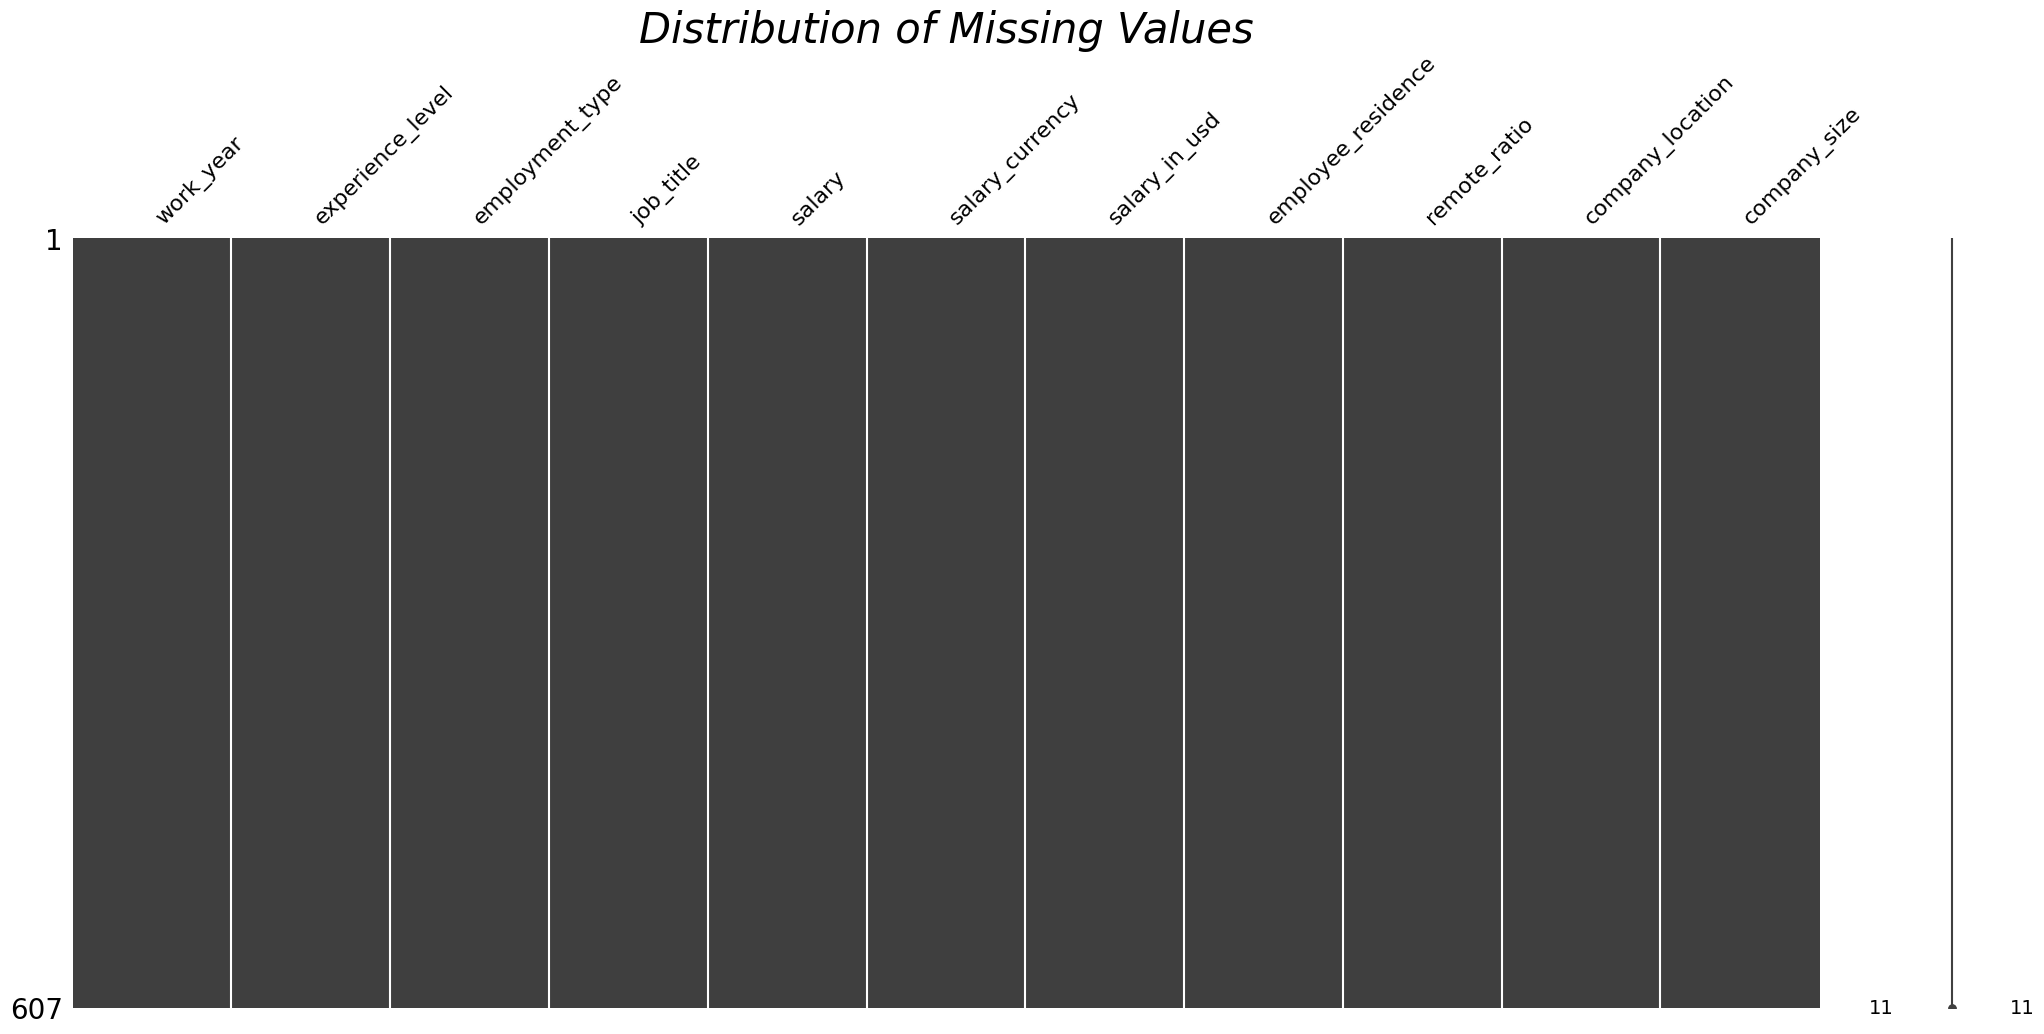

In [126]:
msno.matrix(ds)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')
plt.show()

# Data Science Job Count in 2020-2022 Period


In [127]:
fig = px.pie(ds, names='work_year',
             title='Proportion of Working Year')
            #  color_discrete_sequence=px.colors.sequential.Turbo)

fig.show()

# Experience Level Distribution

### 250+ people are Senior Level while only 25+ are expert
### Entry and Intermediate are around 100 and 200 respectively

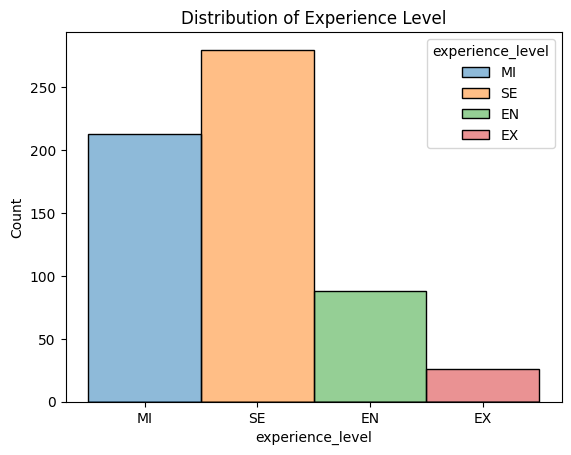

In [128]:
#Distribution of Experience Level
sns.histplot(ds, x='experience_level', hue='experience_level')
plt.title("Distribution of Experience Level")
plt.show()


# Employment Type Distribution
### Most are fulltime employees

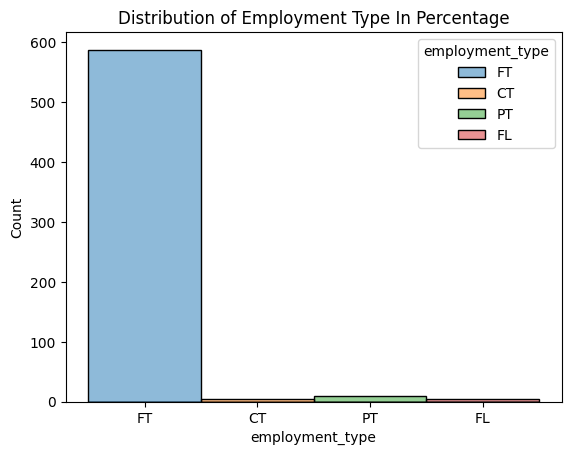

In [152]:
# Distribution of Employment Type
sns.histplot(ds, x='employment_type', hue='employment_type')
plt.title("Distribution of Employment Type")
plt.show()

# Top 10 Popular jobs in Data Science in this period

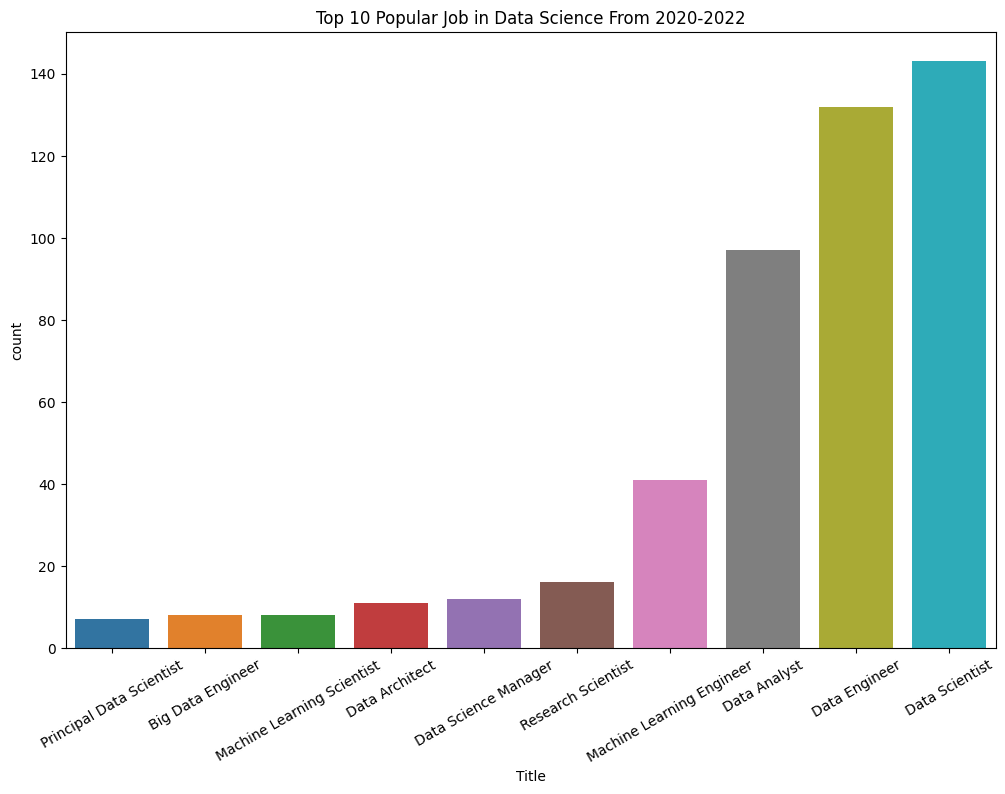

In [142]:
#Job title
job = ds['job_title'].value_counts().rename_axis("job_title").to_frame("count").reset_index()
top_10_popular_jobs = job.nlargest(n=10, columns='count').sort_values(by='count')


#Plot top 10 popular
plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_10_popular_jobs, x='job_title', y='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax.set_xlabel("Title")
ax.set_title("Top 10 Popular Job in Data Science From 2020-2022")
plt.show()

# Top 5 popular data jobs in each year

/var/folders/1n/35j_zz2x1hn030g8mc0vzm5h0000gn/T/ipykernel_853/414824410.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/1n/35j_zz2x1hn030g8mc0vzm5h0000gn/T/ipykernel_853/414824410.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/1n/35j_zz2x1hn030g8mc0vzm5h0000gn/T/ipykernel_853/414824410.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



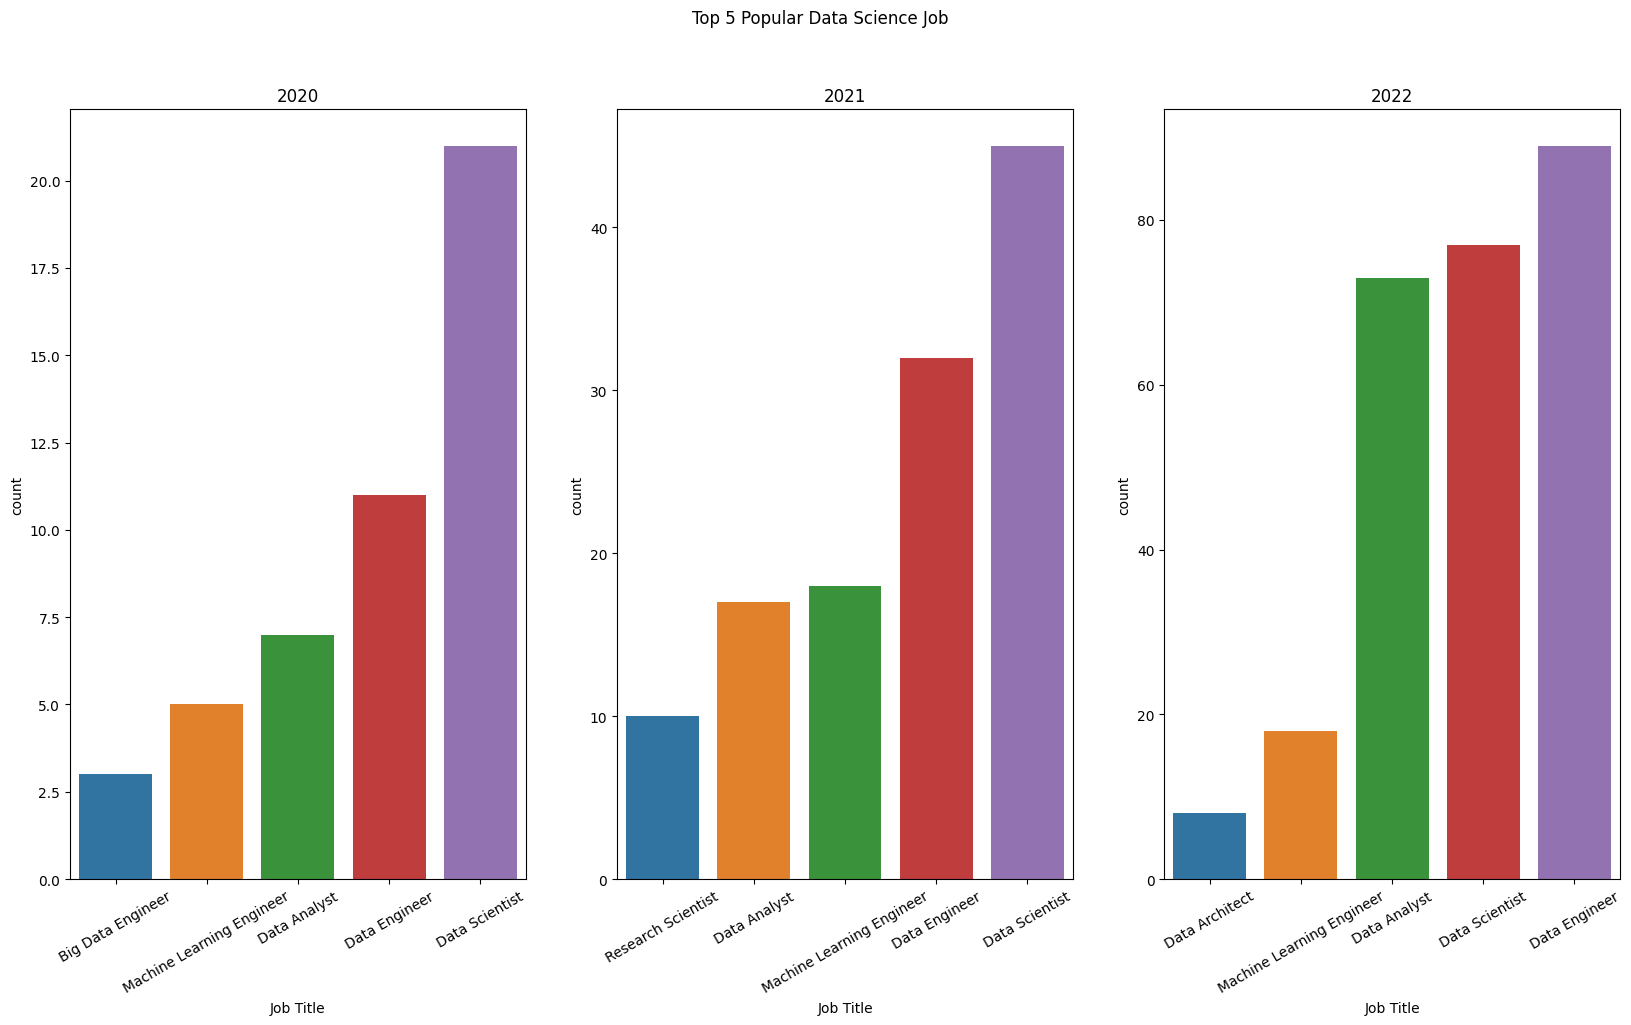

In [141]:
#Top job in each year
jobs_each_year = ds.groupby("work_year")['job_title'].value_counts().to_frame("count").reset_index(level=1)


def top5_year(year=int(),df=jobs_each_year):
    return df.loc[year].nlargest(n=5, columns='count').sort_values(by='count')

top5_job = [top5_year(2020),top5_year(2021),top5_year(2022)]
# draw top 5 each year
fig, axes = plt.subplots(1,3,figsize =(20,10))
fig.suptitle("Top 5 Popular Data Science Job")
years = ["2020","2021","2022"]

for i in range(3):  
    # set job title in top 5 for each year
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 30) 
    
    #set years
    axes[i].set_title(years[i])
    #Plot data
    sns.barplot(ax = axes[i],data=top5_job[i], x='job_title', y='count')
    axes[i].set_xlabel("Job Title")
plt.show()


# Top 5 jobs with High Salary

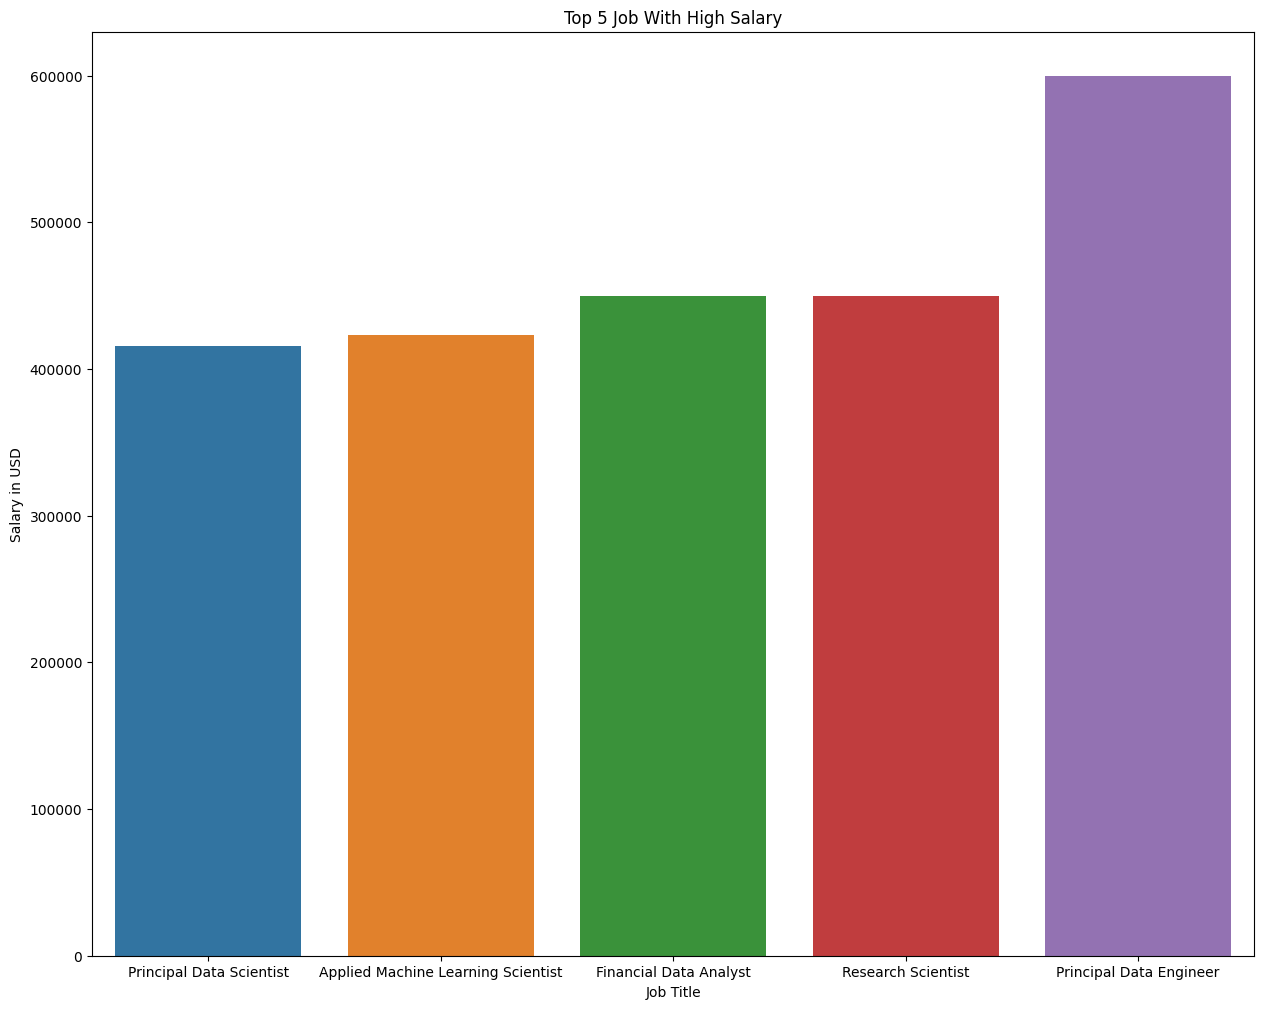

In [139]:
salary = ds[['job_title','salary_in_usd']].sort_values("salary_in_usd", ascending=False)
top_5_job_salary = salary.nlargest(n=5, columns='salary_in_usd').sort_values(ascending=True, by='salary_in_usd')


fig = plt.figure(figsize=(15,12))
ax = sns.barplot(data = top_5_job_salary, x='job_title', y='salary_in_usd')
ax.set_xlabel("Job Title")
ax.set_ylabel("Salary in USD")
ax.set_title("Top 5 Job With High Salary")
plt.show()

# Average Salary for Each Experience Level

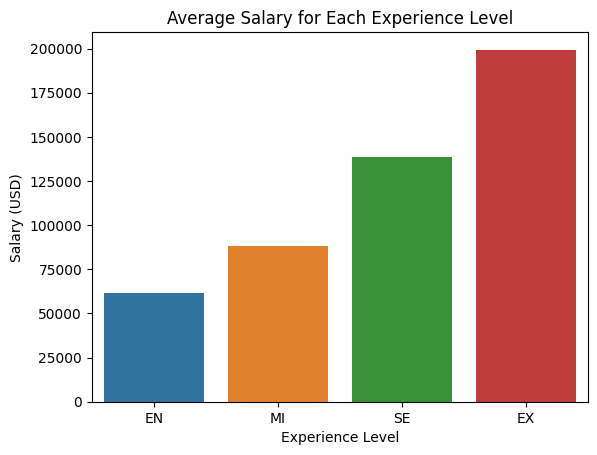

In [136]:
mean_salary = ds.groupby("experience_level")['salary_in_usd'].agg('mean').sort_values().to_frame()
fig = sns.barplot(data = mean_salary, x = mean_salary.index, y='salary_in_usd')
fig.set_xlabel("Experience Level")
fig.set_ylabel("Salary (USD)")
fig.set_title("Average Salary for Each Experience Level")
plt.show()

# Average Salary of Common Jobs For Different Expertise

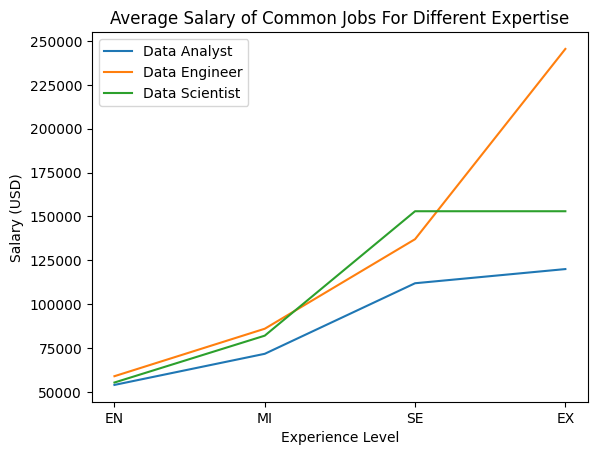

In [232]:
#Extract salary for DA,DS,DE in each experience
levels = ['EN',"MI","SE","EX"]
job_title = ['Data Analyst', "Data Engineer", "Data Scientist"]
def get_salary_by_level(level, title):
    return ds[(ds.experience_level == level) & (ds.job_title == title)]['salary_in_usd']

da_mean = []
de_mean = []
ds_mean = []

for i in range(len(levels)):
    da_mean.append(get_salary_by_level(levels[i], "Data Analyst").mean())
    de_mean.append(get_salary_by_level(levels[i], "Data Engineer").mean())
    ds_mean.append(get_salary_by_level(levels[i], "Data Scientist").mean())

mean = pd.DataFrame({
    "Levels":levels,
    "DA":da_mean, 
    "DE":de_mean,
    "DS":ds_mean
})
mean['DS'] = mean["DS"].fillna(method ='ffill')

fig, ax = plt.subplots()
ax = sns.lineplot(x='Levels', y="DA", data=mean)
ax = sns.lineplot(x='Levels', y='DE', data=mean)
ax = sns.lineplot(x = "Levels", y="DS", data=mean)

ax.legend(job_title)
ax.set_xlabel("Experience Level")
ax.set_ylabel("Salary (USD)")
ax.set_title("Average Salary of Common Jobs For Different Expertise")



plt.show()






# Remote Distribution

              work_year
remote_ratio           
0                   127
50                   99
100                 381


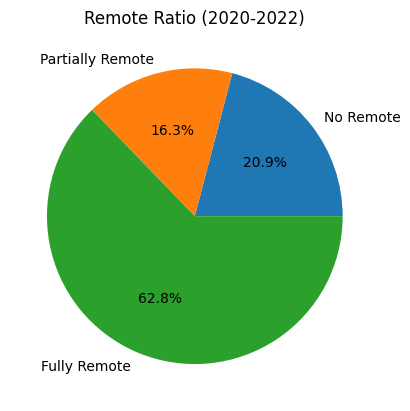

In [246]:
remote_labels = ['No Remote', "Partially Remote", "Fully Remote"]
remote = ds.groupby("remote_ratio")['work_year'].count().to_frame() 
plt.pie(data=remote, labels=remote_labels, x='work_year',  autopct='%1.1f%%')
plt.title("Remote Ratio (2020-2022)")
plt.show()

# Company Size Distribution

              work_year
company_size           
L                   198
M                   326
S                    83


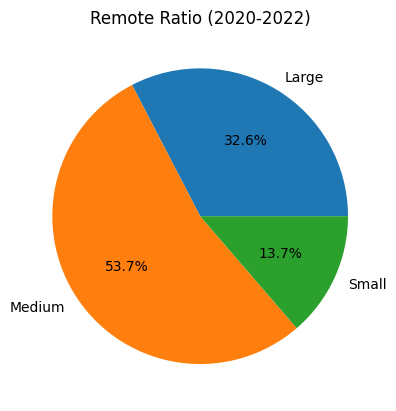

In [249]:
# Company Size
company_labels = ["Large","Medium","Small"]
company = ds.groupby("company_size")["work_year"].count().to_frame()
print(company)
plt.pie(data=company, labels=company_labels, x='work_year',  autopct='%1.1f%%')
plt.title("Remote Ratio (2020-2022)")
plt.show()